# Concrete Compressive Strength.

Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size, as opposed to tensile strength, which withstands loads tending to elongate.

Compressive strength is one of the most important engineering properties of concrete. It is a standard industrial practice that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete. The test requisites differ country to country based on the design code.

Here is your Required [Data ](https://drive.google.com/file/d/1Csmy8fz4BDM70wD07XJYKPqOr8BAPfzE/view?usp=sharing)
# **Good Luck**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [0]:
#creating the dataframe
data=pd.read_excel('Concrete_Data.xls')
#Features,Label seperation
features=data.values[:,:-1]
label=data.values[:,-1]
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


#Data Preprocessing

In [0]:
#checking missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [0]:
#extracting coloums names
col_names=[]
for i,r in list(data.iteritems()):
  col_names.append(i)
features_names=col_names[:-1]
label_name=col_names[-1]

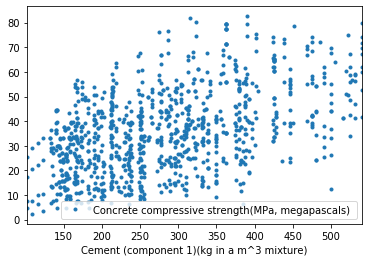

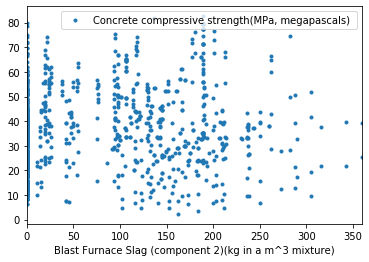

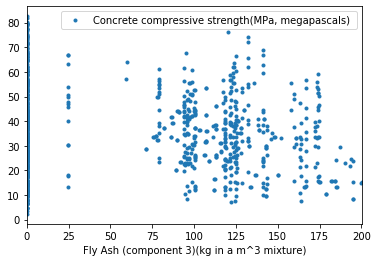

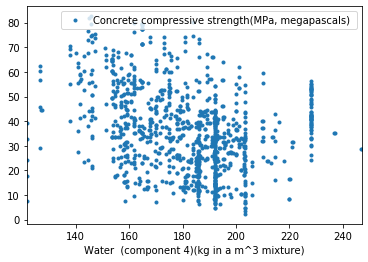

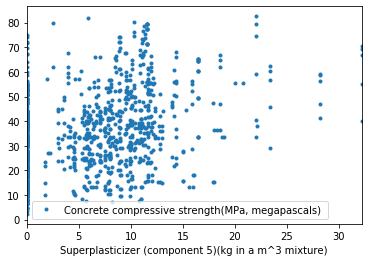

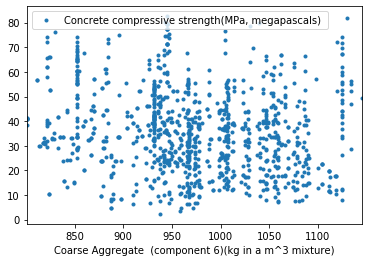

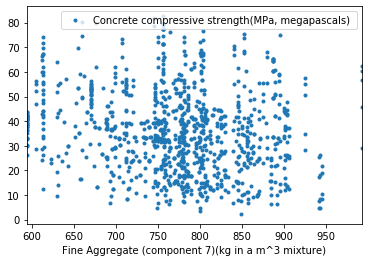

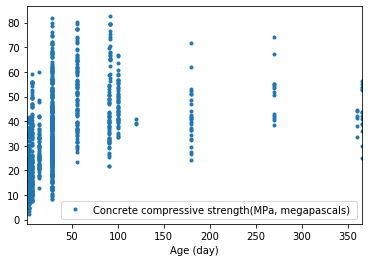

In [0]:
#Determining Feature Selection \ ploting relationship between features and label indiviually
for i in features_names:
  data.plot(x= i, y=label_name, style='.')

In [0]:


import matplotlib.pyplot as plt
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1,-0.275193,-0.397475,-0.0815436,0.0927714,-0.109356,-0.22272,0.0819473,0.497833
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275193,1,-0.323569,0.107286,0.0433757,-0.283998,-0.281593,-0.0442458,0.134824
Fly Ash (component 3)(kg in a m^3 mixture),-0.397475,-0.323569,1,-0.257044,0.37734,-0.00997679,0.0790764,-0.15437,-0.105753
Water (component 4)(kg in a m^3 mixture),-0.0815436,0.107286,-0.257044,1,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer (component 5)(kg in a m^3 mixture),0.0927714,0.0433757,0.37734,-0.657464,1,-0.266303,0.222501,-0.192717,0.366102
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.109356,-0.283998,-0.00997679,-0.182312,-0.266303,1,-0.178506,-0.00301551,-0.164928
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.22272,-0.281593,0.0790764,-0.450635,0.222501,-0.178506,1,-0.156094,-0.167249
Age (day),0.0819473,-0.0442458,-0.15437,0.277604,-0.192717,-0.00301551,-0.156094,1,0.328877
"Concrete compressive strength(MPa, megapascals)",0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1


##Spliting Train and Test Samples Test size =0.2

In [0]:
# Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test= train_test_split(features,label,test_size=0.2,random_state = 0 , shuffle= True)

#Standerdization

In [0]:

sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

#Best Degree for polynomial

In [0]:
from regression_functions import slct_bst_dgree

In [0]:

bst_r2scr,bst_dgre =slct_bst_dgree(x_train,x_test,y_train,y_test,7)

list of r2score with different degrees was: {0.6368981103411094: 1, 0.7635510407251077: 2, 0.8059308276474442: 3, -32.46310728019546: 4, -3323099.1155400197: 5, -20992498.893086787: 6, -4431477.731433724: 7}
r2 score is : 0.8059308276474442 
 the best degree is : 3


#Tries of Different Regressions

##Liner regression Model degree=1 (neutral)

In [0]:
#my function
from regression_functions import poly_lner_reg
r_score, lin_reg , poly_reg , pred = poly_lner_reg(x_train,x_test,y_train,y_test,degree=1)

r2 scaore is :  0.6368981103411094


##Liner regression Model degree=3 (polynominal)

In [0]:
r_score, lin_reg , poly_reg , pred = poly_lner_reg(x_train,x_test,y_train,y_test,degree=3)

r2 scaore is :  0.8059308276474442


#Best Ridge alpha degree=1 (neutral)

In [0]:
ls=[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
from regression_functions import ridg_bst_alpha
bst_r_score , bst_alpha , ridge , poly = ridg_bst_alpha(x_train,x_test,y_train,y_test,ls,degree=1)

values of alpha are: {0.63689811034111: 1e-15, 0.636898110364845: 1e-10, 0.6368981127146331: 1e-08, 0.6369215737719056: 0.0001, 0.637109535760553: 0.001, 0.6375293094641892: 0.01, 0.467369394890355: 1, 0.19583868314543995: 5, 0.10999533469710698: 10, 0.05609887595666563: 20}
best r2 scaore is :  0.6375293094641892
best alpha is: 0.01


##Best Ridge alpha degree=5 (poly)

In [0]:
ls=[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
from regression_functions import ridg_bst_alpha
bst_r_score , bst_alpha , ridge , poly = ridg_bst_alpha(x_train,x_test,y_train,y_test,ls,degree=5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


values of alpha are: {-2690655.3337039566: 1e-15, -4657.8668117833295: 1e-10, -98.09380064069714: 1e-08, 0.7528158990240533: 0.0001, 0.8212443638011346: 0.001, 0.8525225600269185: 0.01, 0.6930793299329212: 1, 0.53919715706396: 5, 0.44922854752926067: 10, 0.3520807934445247: 20}
best r2 scaore is :  0.8525225600269185
best alpha is: 0.01


##Best Lasso alpha degree=1 (netural)

---



In [0]:
lsd=[1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10,20,30,40]
from regression_functions import lasso_bst_alpha
bst_r_score , bst_alpha , ridge , poly = lasso_bst_alpha(x_train,x_test,y_train,y_test,lsd,degree=1)

values of alpha are: {0.6368981103411109: 1e-15, 0.6368981104785312: 1e-10, 0.636898124077637: 1e-08, 0.6369118162168849: 1e-05, 0.6370322695010427: 0.0001, 0.6379521033210449: 0.001, 0.6369430429521536: 0.01, -0.00759422299508028: 40}
best r2 scaore is :  0.6379521033210449
best alpha is: 0.001


##Best Lasso alpha degree=7 (poly)


In [0]:
lsd=[1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10,20,30,40]
from regression_functions import lasso_bst_alpha
R_bst_r_score , R_bst_alpha , R_ridge , R_poly = lasso_bst_alpha(x_train,x_test,y_train,y_test,lsd,degree=7)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2394.237333327005, tolerance: 23.258623112598066
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2394.245008565215, tolerance: 23.258623112598066
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2395.004561406017, tolerance: 23.258623112598066
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2925.6025

values of alpha are: {0.5362706748165563: 1e-15, 0.5362722430465419: 1e-10, 0.5364275123198264: 1e-08, 0.6714802123319462: 1e-05, 0.8445250695376326: 0.0001, 0.8812929967519042: 0.001, 0.7944198014158819: 0.01, -0.00759422299508028: 40}
best r2 scaore is :  0.8812929967519042
best alpha is: 0.001


#BEST R2Score Came from Ridge (degree=7,alpha =0.001)

In [0]:
R_bst_r_score , R_bst_alpha , R_ridge , R_poly = lasso_bst_alpha(x_train,x_test,y_train,y_test,alpha_list=[0.001],degree=7)

values of alpha are: {0.8812929967519042: 0.001}
best r2 scaore is :  0.8812929967519042
best alpha is: 0.001


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1138.184717178232, tolerance: 23.258623112598066
  positive)


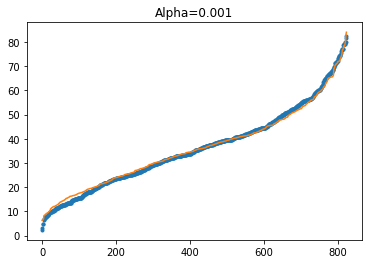

In [0]:
plt.title('Alpha=0.001')
plt.plot(np.sort(y_train) ,'.', np.sort(R_ridge.predict(R_poly.fit_transform(x_train))),'-')
plt.show()


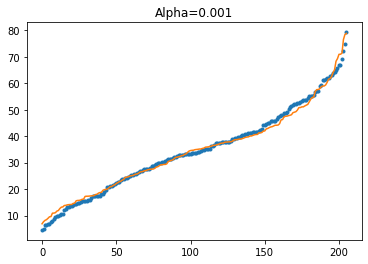

------------------


In [0]:
plt.title('Alpha=0.001')
plt.plot(np.sort(y_test) ,'.', np.sort(R_ridge.predict(R_poly.transform(x_test))),'-')
plt.show()
print('------------------')